### Import Libraries & Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append(r'C:\Users\rshaw\Desktop\EC Utbildning - Data Science\Kurs 9 - Project\Project\ds23_projektkurs\predictive-maintenance\src\Data processing scripts')

### Load pre-processed data from SQL database

In [3]:
from SQL_module import SQLManager
sql_manager = SQLManager('SQLManagerLogger', 'sql_manager_log.log')
engine = sql_manager.new_engine(
    dialect='mssql',  
    server='MSI',  
    database='predictive_maintenance_db',  
    integrated_security=True  
)

def load_data(table_name):
    query = f"SELECT * FROM {table_name}"
    df = sql_manager.fetch_data(query)
    return df

errors_df = load_data('PdM_errors')
failures_df = load_data('PdM_failures')
machines_df = load_data('PdM_machines')
maint_df = load_data('PdM_maint')
telemetry_df = load_data('PdM_telemetry')


### Read datasets

In [4]:
print("Errors DataFrame:")
display(errors_df.head())

print("Failures DataFrame:")
display(failures_df.head())

print("Machines DataFrame:")
display(machines_df.head())

print("Maintenance DataFrame:")
display(maint_df.head())

print("Telemetry DataFrame:")
display(telemetry_df.head())


Errors DataFrame:


,datetime,machineID,errorID,date
0,2015-01-03 07:00:00,1,error1,2015-01-03
1,2015-01-03 20:00:00,1,error3,2015-01-03
2,2015-01-04 06:00:00,1,error5,2015-01-04
3,2015-01-10 15:00:00,1,error4,2015-01-10
4,2015-01-22 10:00:00,1,error4,2015-01-22


Failures DataFrame:


,datetime,machineID,failure,date
0,2015-01-05 06:00:00,1,comp4,2015-01-05
1,2015-03-06 06:00:00,1,comp1,2015-03-06
2,2015-04-20 06:00:00,1,comp2,2015-04-20
3,2015-06-19 06:00:00,1,comp4,2015-06-19
4,2015-09-02 06:00:00,1,comp4,2015-09-02


Machines DataFrame:


,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


Maintenance DataFrame:


,datetime,machineID,comp,date
0,2014-06-01 06:00:00,1,comp2,2014-06-01
1,2014-07-16 06:00:00,1,comp4,2014-07-16
2,2014-07-31 06:00:00,1,comp3,2014-07-31
3,2014-12-13 06:00:00,1,comp1,2014-12-13
4,2015-01-05 06:00:00,1,comp4,2015-01-05


Telemetry DataFrame:


,datetime,machineID,volt,rotate,pressure,vibration,date
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,2015-01-01
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,2015-01-01
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,2015-01-01
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,2015-01-01
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,2015-01-01


In [6]:
print(telemetry_df.head())
print(telemetry_df['datetime'].min(), telemetry_df['datetime'].max())


             datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration        date  
0  45.087686  2015-01-01  
1  43.413973  2015-01-01  
2  34.178847  2015-01-01  
3  41.122144  2015-01-01  
4  25.990511  2015-01-01  
2015-01-01 06:00:00 2016-01-01 06:00:00


- Here we see sensor data for 4 operational settings that occurred over 12 months between January 1, 2015, and January 01, 2016. 


In [5]:
print(failures_df.head())
print(failures_df['datetime'].min(), failures_df['datetime'].max())


             datetime  machineID failure        date
0 2015-01-05 06:00:00          1   comp4  2015-01-05
1 2015-03-06 06:00:00          1   comp1  2015-03-06
2 2015-04-20 06:00:00          1   comp2  2015-04-20
3 2015-06-19 06:00:00          1   comp4  2015-06-19
4 2015-09-02 06:00:00          1   comp4  2015-09-02
2015-01-02 03:00:00 2015-12-31 06:00:00


- Here we see that failures occurred over 12 months between January 2, 2015, and December 31, 2015. - 
- Failures involve different components (comp1, comp2, comp4), all related to machine ID 1 during this time range. 

### Here we drill down to focus on one machine from 100, namely machine no. 17

In [7]:
df_sel_17 = telemetry_df.loc[telemetry_df['machineID'] == 17].reset_index(drop=True)
print(df_sel_17.head(n=5))

             datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00         17  161.633747  462.698035   90.377391   
1 2015-01-01 07:00:00         17  189.976790  372.798586  100.125906   
2 2015-01-01 08:00:00         17  186.476591  498.922070   97.924391   
3 2015-01-01 09:00:00         17  167.836488  483.978488  111.113911   
4 2015-01-01 10:00:00         17  182.431544  502.774702  108.220639   

   vibration        date  
0  49.453414  2015-01-01  
1  57.482661  2015-01-01  
2  47.786767  2015-01-01  
3  66.352721  2015-01-01  
4  54.571089  2015-01-01  


In [8]:
df_sel_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8761 entries, 0 to 8760
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   8761 non-null   datetime64[ns]
 1   machineID  8761 non-null   int64         
 2   volt       8761 non-null   float64       
 3   rotate     8761 non-null   float64       
 4   pressure   8761 non-null   float64       
 5   vibration  8761 non-null   float64       
 6   date       8761 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 479.2+ KB


 - This machine number 17 has 8761 rows and 7 columns, including telemetry data (volt, rotate, pressure, vibration) and machineID.
- All columns are numeric except for the datetime column which is a timestamp, and date which is an object type (string).
- Memory used is approx 479.2 KB 
- There are no missing values.

In [31]:
print(df_sel_17[['volt', 'rotate', 'pressure', 'vibration']].describe())

              volt       rotate     pressure    vibration
count  8761.000000  8761.000000  8761.000000  8761.000000
mean    170.726237   445.968525   101.342908    40.549045
std      15.694063    53.034564    11.325382     5.516199
min     107.286569   223.268150    66.079113    20.487291
25%     160.150078   411.696585    93.976460    36.896442
50%     170.503300   446.855943   100.851812    40.320077
75%     181.075973   482.323013   107.945500    43.925871
max     240.105419   637.852152   152.605505    70.587984


- Sensor Ranges: All sensor readings (voltage, rotation, pressure, vibration) show reasonable variability, with voltage and rotation having the highest range of values.

- Relatively Low Variation in Vibration: The vibration sensor has the lowest standard deviation, meaning its values are more tightly clustered around the mean compared to other sensors

In [10]:
df_sel_17.duplicated().sum()

np.int64(0)

In [11]:
round(df_sel_17.isnull().sum() / df_sel_17.isnull().count() * 100, 2)

datetime     0.0
machineID    0.0
volt         0.0
rotate       0.0
pressure     0.0
vibration    0.0
date         0.0
dtype: float64

- This is just an additional check, but we can confirm here that there are no missing values and that our pre-processing of the raw datasets cleared any duplicates.

In [12]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(df_sel_17, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df_sel_17, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df_sel_17, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df_sel_17, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df_sel_17[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df_sel_17[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

Skipping column: datetime
Skipping column: machineID


Skipping column: date


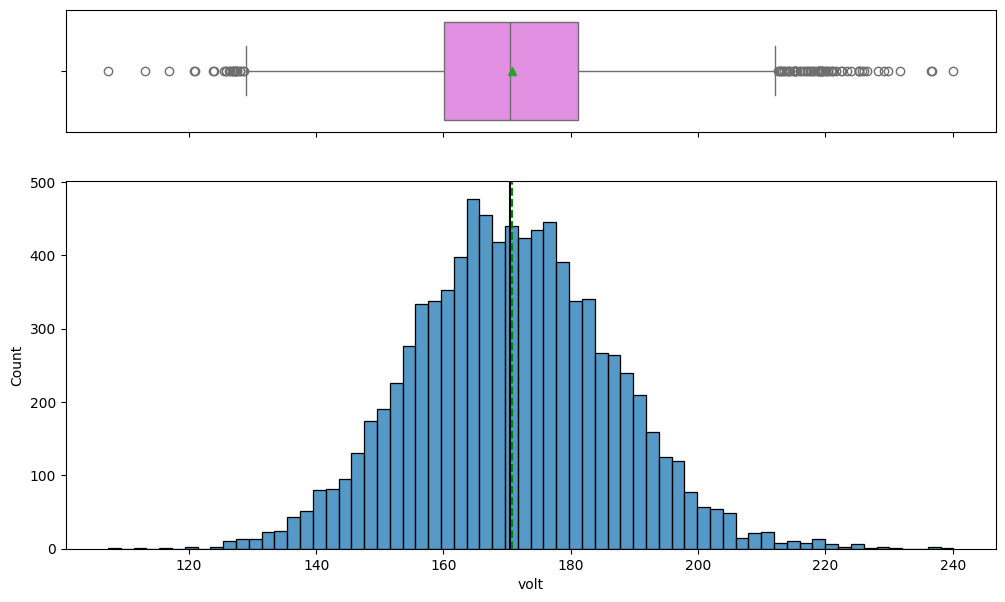

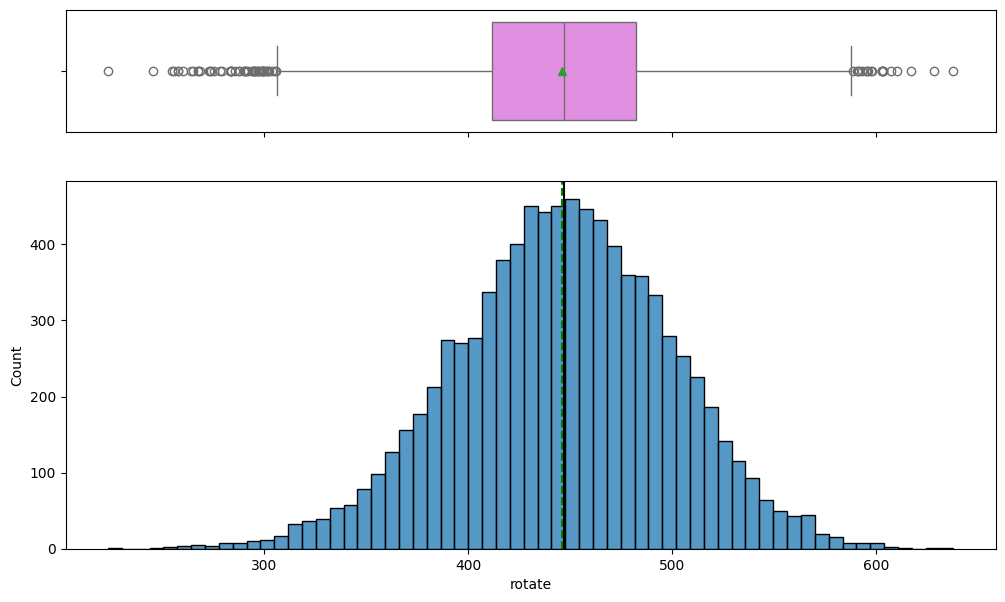

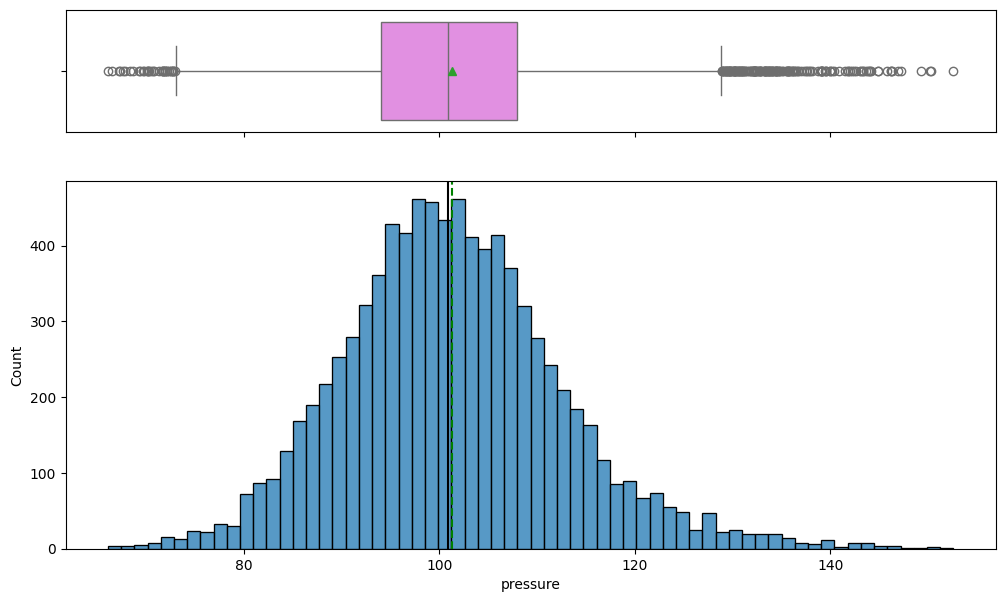

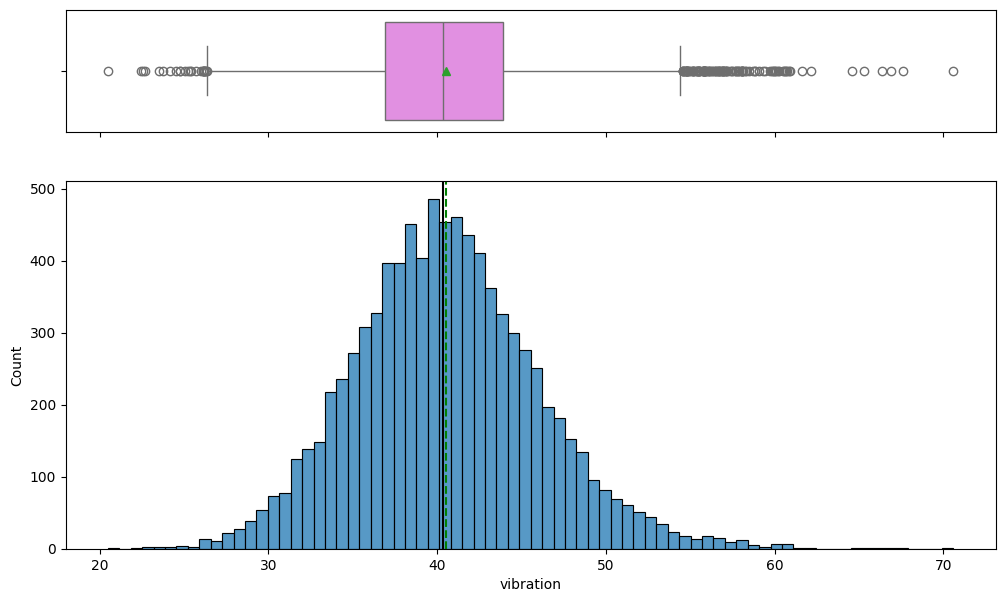

In [13]:
def is_numeric(series):
    return pd.api.types.is_numeric_dtype(series)

# Loop through columns, but only plot numeric features and skip 'machineID'
for feature in df_sel_17.columns:
    if is_numeric(df_sel_17[feature]) and feature != 'machineID':
        histogram_boxplot(df_sel_17, feature, figsize=(12, 7), kde=False, bins=None)
    else:
        print(f"Skipping column: {feature}")

- Most of the sensors show a fairly normal distribution, with the mean and median values aligning closely.

- Standard Deviation appears to vary across the sensors, with a considerable portion of sensor readings showing spread beyond typical ranges. While some distributions have a higher concentration around the mean, sensors like pressure and voltage show a greater spread with extreme outliers.

- Outliers are present across all four sensors. The voltage and rotation sensors have several outliers on both the lower and upper ends. While these outliers exist, they don't seem to significantly distort the central values (mean and median). The pressure and vibration sensors also show a reasonable number of outliers on the higher end.

- The rotation sensor shows a slight right skew, as shown by a few high-value outliers stretching beyond the bulk of the data. Meanwhile, vibration shows a slight left skew, with more values on the lower side, though it is less pronounced.

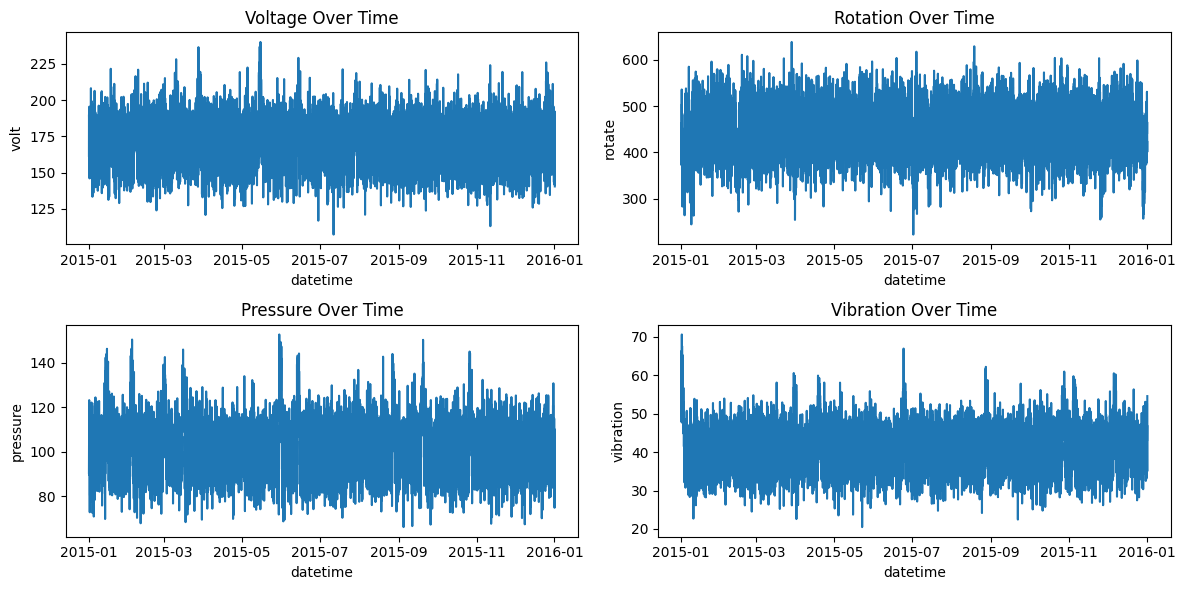

In [16]:
plt.figure(figsize=(12, 6))

# Plot voltage over time
plt.subplot(2, 2, 1)
sns.lineplot(x='datetime', y='volt', data=df_sel_17)
plt.title('Voltage Over Time')

# Plot rotation over time
plt.subplot(2, 2, 2)
sns.lineplot(x='datetime', y='rotate', data=df_sel_17)
plt.title('Rotation Over Time')

# Plot pressure over time
plt.subplot(2, 2, 3)
sns.lineplot(x='datetime', y='pressure', data=df_sel_17)
plt.title('Pressure Over Time')

# Plot vibration over time
plt.subplot(2, 2, 4)
sns.lineplot(x='datetime', y='vibration', data=df_sel_17)
plt.title('Vibration Over Time')

plt.tight_layout()
plt.show()

- There seems to be quite a few spikes that could be anomalies leading to errors or failures.
- We'll investigate further using z-scores to see how many standard deviations a sensor data point is from the mean, where we will target any point outside of -3 and +3 as anomaly.

In [29]:
from sklearn.preprocessing import StandardScaler

# Use StandardScaler to compute Z-scores
scaler = StandardScaler()
z_scores = scaler.fit_transform(df_sel_17[['volt', 'rotate', 'pressure', 'vibration']])
z_scores_df = pd.DataFrame(z_scores, columns=['volt_zscore', 'rotate_zscore', 'pressure_zscore', 'vibration_zscore'])

# Combine Z-scores with the original data
df_anomalies = pd.concat([df_sel_17, z_scores_df], axis=1)

# Identify anomalies where Z-scores are greater than 3 or less than -3
anomalies = df_anomalies[
    (df_anomalies['volt_zscore'].abs() > 3) |
    (df_anomalies['rotate_zscore'].abs() > 3) |
    (df_anomalies['pressure_zscore'].abs() > 3) |
    (df_anomalies['vibration_zscore'].abs() > 3)
]

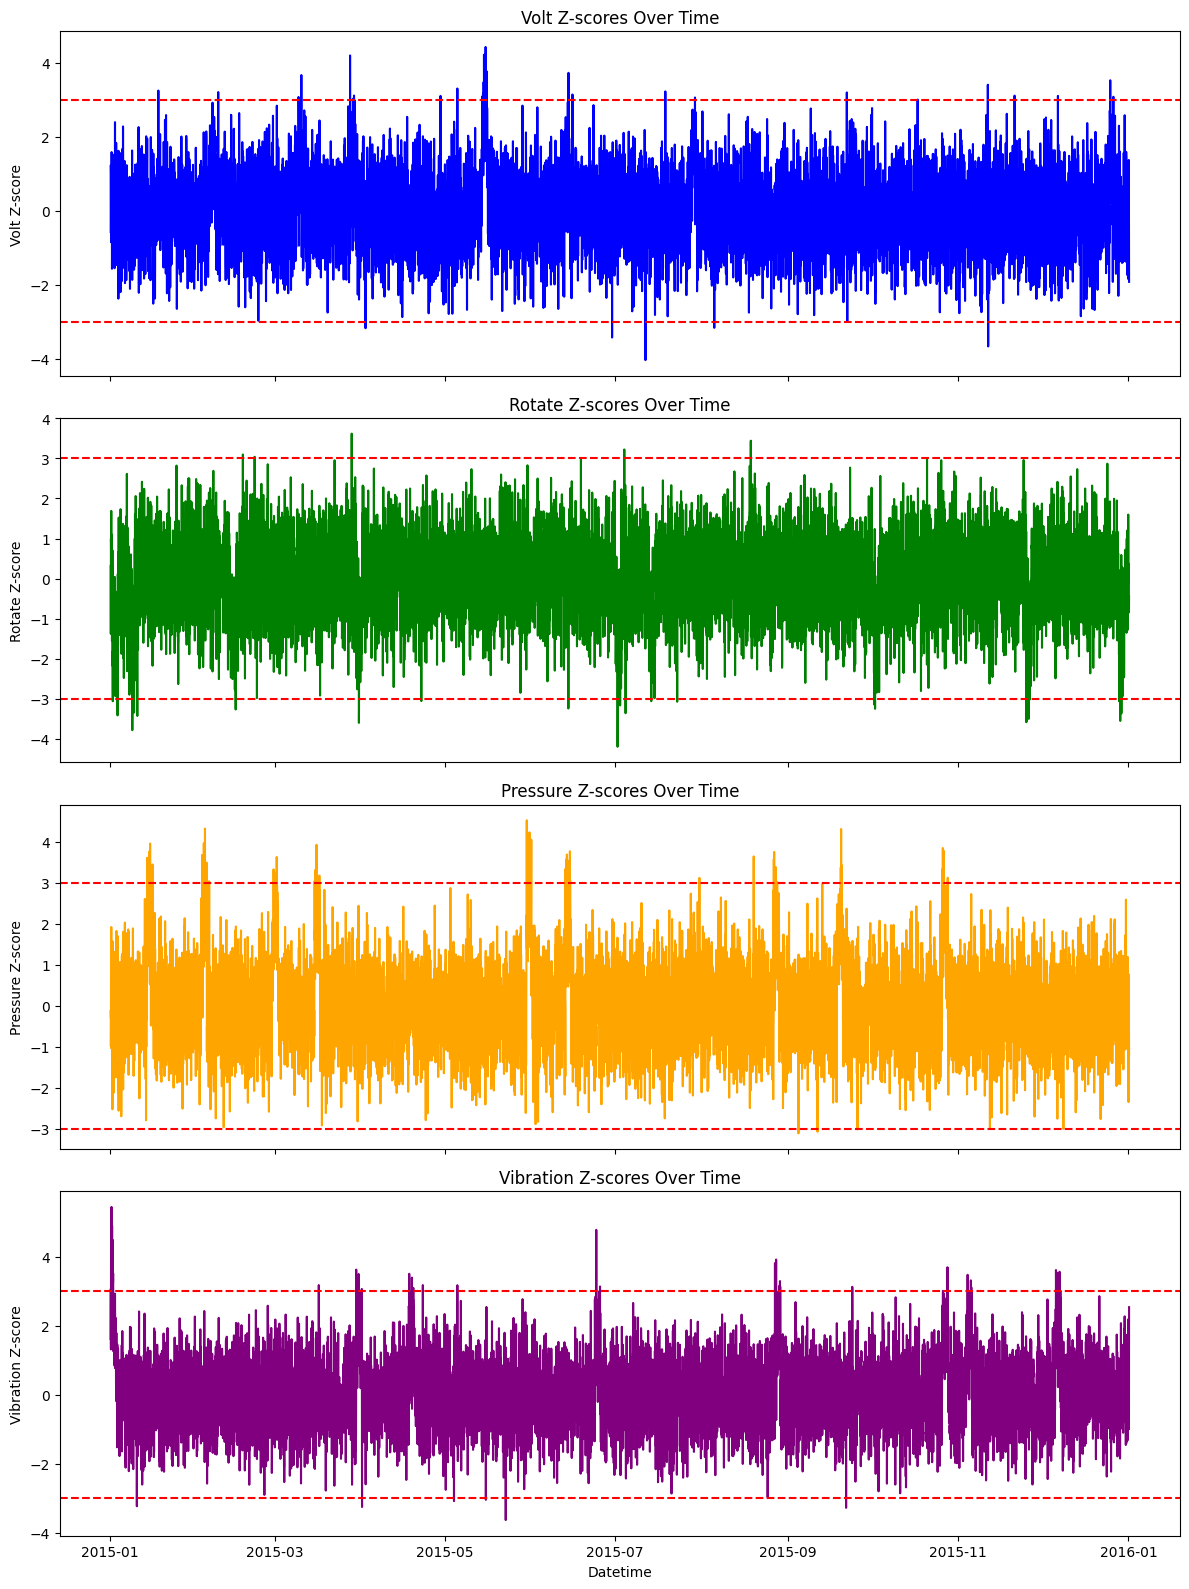

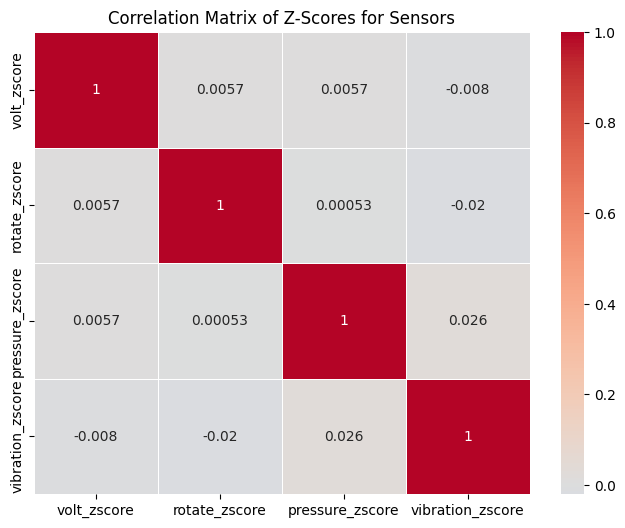

In [28]:
df_anomalies['datetime'] = pd.to_datetime(df_anomalies['datetime'])

# Plot Z-scores for each sensor over time to visually examine trends
fig, axs = plt.subplots(4, 1, figsize=(12, 16), sharex=True)

axs[0].plot(df_anomalies['datetime'], df_anomalies['volt_zscore'], label='Volt Z-score', color='b')
axs[0].set_ylabel('Volt Z-score')
axs[0].axhline(y=3, color='r', linestyle='--')
axs[0].axhline(y=-3, color='r', linestyle='--')
axs[0].set_title('Volt Z-scores Over Time')

axs[1].plot(df_anomalies['datetime'], df_anomalies['rotate_zscore'], label='Rotate Z-score', color='g')
axs[1].set_ylabel('Rotate Z-score')
axs[1].axhline(y=3, color='r', linestyle='--')
axs[1].axhline(y=-3, color='r', linestyle='--')
axs[1].set_title('Rotate Z-scores Over Time')

axs[2].plot(df_anomalies['datetime'], df_anomalies['pressure_zscore'], label='Pressure Z-score', color='orange')
axs[2].set_ylabel('Pressure Z-score')
axs[2].axhline(y=3, color='r', linestyle='--')
axs[2].axhline(y=-3, color='r', linestyle='--')
axs[2].set_title('Pressure Z-scores Over Time')

axs[3].plot(df_anomalies['datetime'], df_anomalies['vibration_zscore'], label='Vibration Z-score', color='purple')
axs[3].set_ylabel('Vibration Z-score')
axs[3].axhline(y=3, color='r', linestyle='--')
axs[3].axhline(y=-3, color='r', linestyle='--')
axs[3].set_title('Vibration Z-scores Over Time')


axs[3].set_xlabel('Datetime')
plt.tight_layout()
plt.show()

# Checking correlation between sensor readings (volt, rotate, pressure, vibration)
correlation_matrix = df_anomalies[['volt_zscore', 'rotate_zscore', 'pressure_zscore', 'vibration_zscore']].corr()
plt.figure(figsize=(8, 6)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix of Z-Scores for Sensors')
plt.show()

- Both pressure and vibration seem to have more frequent spikes exceeding the threshold, indicating more frequent anomalies that need closer inspection.

- The most notable correlation is between the rotate_zscore and vibration_zscore (0.63), meaning these sensors tend to show anomalies at the same time. On the other hand, volt_zscore and pressure_zscore have a moderate negative correlation (-0.60), indicating an inverse relationship.

- These anomalies and correlations give us a good reason to zoom into the time period with most visual peaks during during the first quarter of 2015, to investigate potential patterns, causes, and behavior.

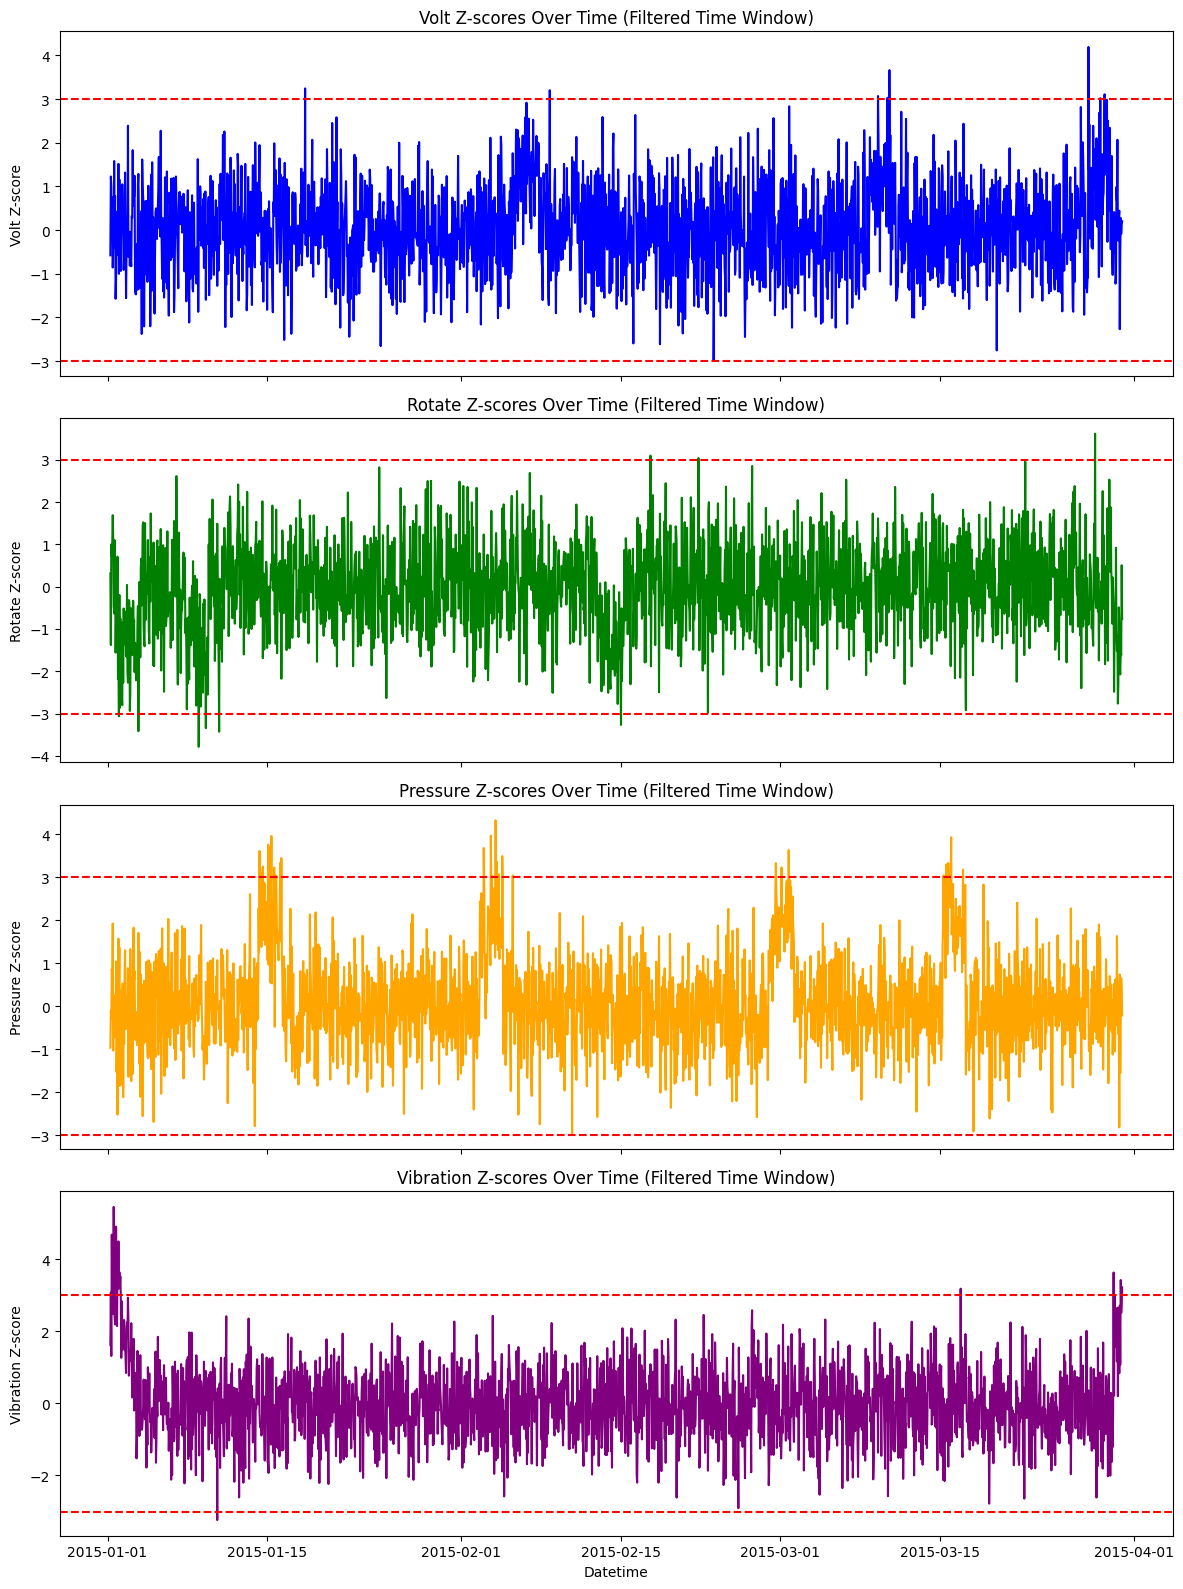

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Example of filtering data for a specific time window
# Assuming df_anomalies is your DataFrame that includes a 'datetime' column
# Replace the time window with your preferred range

# Convert datetime column to pandas datetime if it's not already
df_anomalies['datetime'] = pd.to_datetime(df_anomalies['datetime'])

# Define the time window (example: focusing on Jan to Mar 2015)
start_date = '2015-01-01'
end_date = '2015-03-31'

# Filter the DataFrame to the specified time window
df_time_window = df_anomalies[(df_anomalies['datetime'] >= start_date) & (df_anomalies['datetime'] <= end_date)]

# Plot Z-scores for each sensor over time (within the selected time window)
fig, axs = plt.subplots(4, 1, figsize=(12, 16), sharex=True)

# Plot volt Z-scores
axs[0].plot(df_time_window['datetime'], df_time_window['volt_zscore'], label='Volt Z-score', color='b')
axs[0].set_ylabel('Volt Z-score')
axs[0].axhline(y=3, color='r', linestyle='--')
axs[0].axhline(y=-3, color='r', linestyle='--')
axs[0].set_title('Volt Z-scores Over Time (Filtered Time Window)')

# Plot rotate Z-scores
axs[1].plot(df_time_window['datetime'], df_time_window['rotate_zscore'], label='Rotate Z-score', color='g')
axs[1].set_ylabel('Rotate Z-score')
axs[1].axhline(y=3, color='r', linestyle='--')
axs[1].axhline(y=-3, color='r', linestyle='--')
axs[1].set_title('Rotate Z-scores Over Time (Filtered Time Window)')

# Plot pressure Z-scores
axs[2].plot(df_time_window['datetime'], df_time_window['pressure_zscore'], label='Pressure Z-score', color='orange')
axs[2].set_ylabel('Pressure Z-score')
axs[2].axhline(y=3, color='r', linestyle='--')
axs[2].axhline(y=-3, color='r', linestyle='--')
axs[2].set_title('Pressure Z-scores Over Time (Filtered Time Window)')

# Plot vibration Z-scores
axs[3].plot(df_time_window['datetime'], df_time_window['vibration_zscore'], label='Vibration Z-score', color='purple')
axs[3].set_ylabel('Vibration Z-score')
axs[3].axhline(y=3, color='r', linestyle='--')
axs[3].axhline(y=-3, color='r', linestyle='--')
axs[3].set_title('Vibration Z-scores Over Time (Filtered Time Window)')

# Set x-axis label
axs[3].set_xlabel('Datetime')

# Display the plot
plt.tight_layout()
plt.show()


Overall, this first-quarter analysis highlights significant fluctuations, especially in voltage, pressure, and vibration, with several data points indicating potential anomalies or outliers. These might correlate with system irregularities or potential failures if left unchecked.

We can later move to use a Neural Network (e.g., Autoencoders) model to distinguish between normal and abnormal machine behavior by learning the normal operating range. We can use this to set thresholds so that we can act early on anomalies and use an app to schedule maintenance in a way that minimizes downtime and avoids costly breakdowns.

### Feature Engineering

1. Interval for Service (Time Between Maintenance Events)

In [35]:
maint_df['datetime'] = pd.to_datetime(maint_df['datetime'])
maintenance_df = maint_df.sort_values(by=['machineID', 'datetime'])
maintenance_df['service_interval'] = maintenance_df.groupby('machineID')['datetime'].diff()
print(maintenance_df[['machineID', 'datetime', 'service_interval']])

      machineID            datetime service_interval
0             1 2014-06-01 06:00:00              NaT
1             1 2014-07-16 06:00:00          45 days
2             1 2014-07-31 06:00:00          15 days
3             1 2014-12-13 06:00:00         135 days
4             1 2015-01-05 06:00:00          23 days
...         ...                 ...              ...
3281        100 2015-10-10 06:00:00           0 days
3282        100 2015-10-25 06:00:00          15 days
3283        100 2015-11-09 06:00:00          15 days
3284        100 2015-12-09 06:00:00          30 days
3285        100 2015-12-24 06:00:00          15 days

[3286 rows x 3 columns]


2. Interval for Components (Time Between Maintenance and Failure)


In [41]:
print(maintenance_df.head())


             datetime  machineID   comp        date service_interval
0 2014-06-01 06:00:00          1  comp2  2014-06-01              NaT
1 2014-07-16 06:00:00          1  comp4  2014-07-16          45 days
2 2014-07-31 06:00:00          1  comp3  2014-07-31          15 days
3 2014-12-13 06:00:00          1  comp1  2014-12-13         135 days
4 2015-01-05 06:00:00          1  comp4  2015-01-05          23 days


In [40]:
print(failures_df.head())

             datetime  machineID failure        date
0 2015-01-05 06:00:00          1   comp4  2015-01-05
1 2015-03-06 06:00:00          1   comp1  2015-03-06
2 2015-04-20 06:00:00          1   comp2  2015-04-20
3 2015-06-19 06:00:00          1   comp4  2015-06-19
4 2015-09-02 06:00:00          1   comp4  2015-09-02


In [39]:
maintenance_df['datetime'] = pd.to_datetime(maintenance_df['datetime'])
failures_df['datetime'] = pd.to_datetime(failures_df['datetime'])
merged_df = pd.merge(maintenance_df, failures_df, on='machineID', suffixes=('_maint', '_fail'))

# Keep records where maintenance was done before the failure
merged_df = merged_df[merged_df['datetime_maint'] < merged_df['datetime_fail']]

# Calculate the time interval between the last maintenance and the failure
merged_df['failure_interval'] = merged_df['datetime_fail'] - merged_df['datetime_maint']
print(merged_df[['machineID', 'datetime_maint', 'datetime_fail', 'failure_interval']])


       machineID      datetime_maint       datetime_fail failure_interval
0              1 2014-06-01 06:00:00 2015-01-05 06:00:00         218 days
1              1 2014-06-01 06:00:00 2015-03-06 06:00:00         278 days
2              1 2014-06-01 06:00:00 2015-04-20 06:00:00         323 days
3              1 2014-06-01 06:00:00 2015-06-19 06:00:00         383 days
4              1 2014-06-01 06:00:00 2015-09-02 06:00:00         458 days
...          ...                 ...                 ...              ...
24945        100 2015-09-25 06:00:00 2015-12-09 06:00:00          75 days
24948        100 2015-10-10 06:00:00 2015-12-09 06:00:00          60 days
24951        100 2015-10-10 06:00:00 2015-12-09 06:00:00          60 days
24954        100 2015-10-25 06:00:00 2015-12-09 06:00:00          45 days
24957        100 2015-11-09 06:00:00 2015-12-09 06:00:00          30 days

[12703 rows x 4 columns]
